In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
synthetic_db = niidb.FMriActivationsDb('data/synthetic_data.db',
                                       mask='/data/eli/synthetic_data/nifti_files/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(synthetic_db.all(), mask='/data/eli/synthetic_data/nifti_files/wholebrain.nii.gz', num_factors=20, embedding_dim=2)

10/04/2018 14:23:34 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_4.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/04/2018 14:23:37 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_20.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/04/2018 14:23:40 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_5.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/04/2018 14:23:43 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_17.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/04/2018 14:23:45 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_3.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/04/2018 14:23:48 Loading Nifti image /data/eli/synthetic_data/nifti_files/s

In [6]:
dtfa.load_state('data/synthetic_k20_n2000_10032018_163506')

In [11]:
import torch

guide_state = torch.load('data/synthetic_k20_n2000_10032018_163506.dtfa_guide')
dtfa.variational.hyperparams.block__weights.data = guide_state['hyperparams.block__weights']

In [12]:
dtfa.normalize_activations()

[tensor(13.7819),
 tensor(11.8878),
 tensor(12.8600),
 tensor(11.1877),
 tensor(12.2424),
 tensor(13.1142),
 tensor(13.6709),
 tensor(14.4474),
 tensor(12.4188),
 tensor(12.3729),
 tensor(16.5108),
 tensor(13.5133),
 tensor(12.4866),
 tensor(13.8866),
 tensor(14.5202),
 tensor(11.0888),
 tensor(16.0532),
 tensor(11.7258),
 tensor(11.5685),
 tensor(11.2842)]

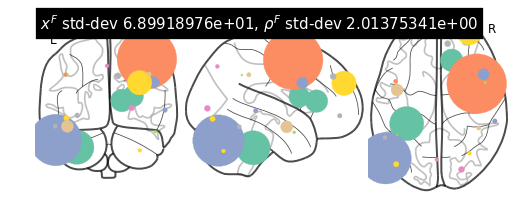

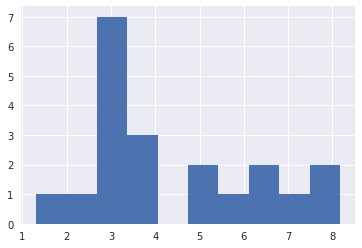

(<nilearn.plotting.displays.OrthoProjector at 0x7ffa2f7c4278>,
 tensor([[ 25.9759,  11.8378,  14.0115],
         [ 14.3276,  29.8021,   9.5078],
         [-33.0854, -36.8115, -39.6381],
         [ 40.6168,   5.2167,  52.9417],
         [-44.8177,   7.7245,  36.6595],
         [ 59.6427, -34.1492,  -0.5714],
         [-55.3095, -73.2324, -32.0461],
         [ 47.7933,  15.0520,  28.6739],
         [ 24.5963, -84.9831,   1.8878],
         [ -1.3648, -74.4611,  45.9995],
         [-43.1445, -48.7015,  36.9716],
         [ 49.5815,   6.3657, -23.3121],
         [-44.0713, -79.5274,  -9.1102],
         [ 32.8722,  58.7926,  28.2160],
         [ 33.0768, -68.0351, -42.9748],
         [-43.0903,  -1.4761, -17.6061],
         [ 42.8178, -41.3073,  37.2499],
         [ 10.0612,  47.2995,  35.4506],
         [-32.7737,  54.3160,  -5.9292],
         [-55.9361, -51.4978, -17.5189]]),
 tensor([ 6.0856,  6.2373,  7.0639,  8.1767,  2.8510,  3.0559,  7.8824,
          4.8635,  3.5686,  2.7414,  1.3019

In [13]:
dtfa.visualize_factor_embedding()

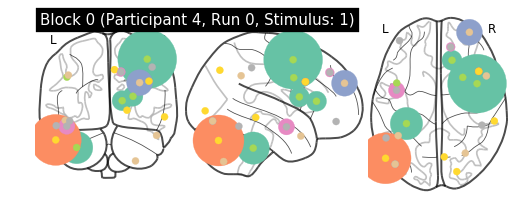

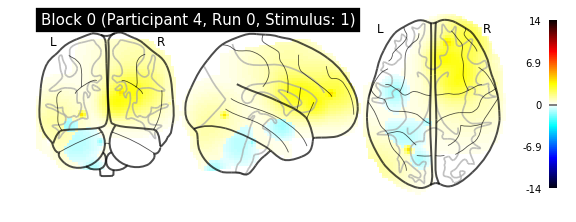

10/04/2018 14:27:07 Reconstruction Error (Frobenius Norm): 2.25571729e+03 out of 5.91962988e+03


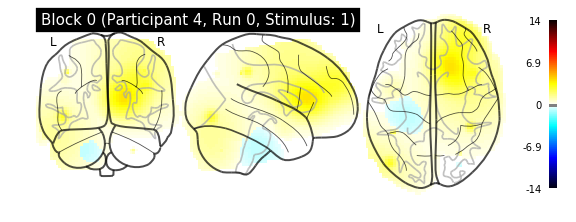

{'weights': tensor([[ 1.8737e+00,  2.4938e+00, -8.4824e-01,  ...,  2.5601e+00,
         -3.7704e-01, -1.7363e+00],
        [ 5.2329e+00,  4.7726e+00, -2.2401e+00,  ...,  3.5970e+00,
         -2.8666e+00, -6.5661e-01],
        [-2.7980e-01,  3.6612e+00,  1.0424e+00,  ...,  2.7492e+00,
         -1.0593e+00,  3.8457e+00],
        ...,
        [ 2.7417e+00,  2.7262e+00, -1.0357e+00,  ...,  4.6938e+00,
         -1.0477e-01,  2.2729e-02],
        [ 2.1446e+00,  3.2910e+00, -1.0430e+00,  ...,  4.5422e+00,
          2.6591e-02, -5.5519e-02],
        [ 4.8492e+00, -5.6833e-01, -1.3945e+00,  ...,  3.8766e+00,
         -7.0862e-01, -1.4472e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0521,  0.0425,  0.0341,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

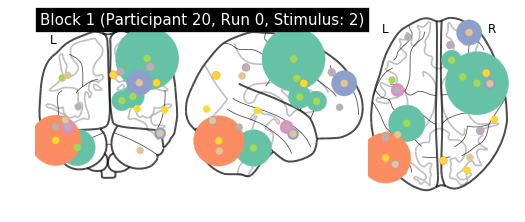

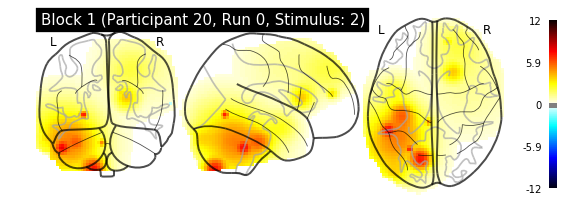

10/04/2018 14:27:53 Reconstruction Error (Frobenius Norm): 2.44326318e+03 out of 7.57596680e+03


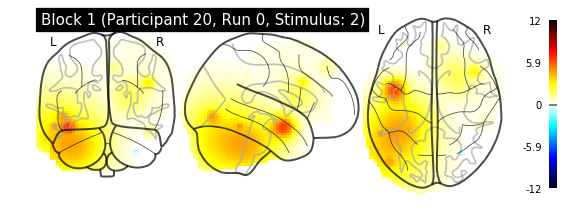

{'weights': tensor([[ 1.5208e+00,  7.4539e-01,  3.1388e+00,  ...,  1.4170e+00,
          3.7707e-01,  4.7317e-01],
        [-4.6737e-01,  5.1476e-01,  2.1378e+00,  ...,  5.6547e+00,
          3.6005e-01, -2.7140e-01],
        [ 3.0097e-01, -3.2374e+00,  4.2590e+00,  ...,  5.2300e+00,
          7.2202e-01,  4.4227e+00],
        ...,
        [ 2.5199e+00, -1.5311e+00,  3.6955e+00,  ...,  2.8287e+00,
         -5.5123e-01,  2.1587e+00],
        [ 2.8519e-01,  1.0731e+00,  4.3983e-02,  ...,  4.2767e+00,
          2.0351e+00, -8.1187e-02],
        [ 3.2568e-01,  1.5837e+00,  3.8618e+00,  ...,  1.1524e+00,
          1.8102e+00,  3.5219e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0342,  0.0271,  0.0210,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

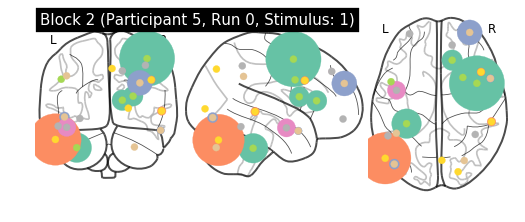

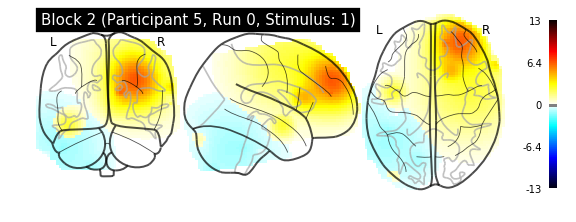

10/04/2018 14:28:38 Reconstruction Error (Frobenius Norm): 2.26584888e+03 out of 6.12725391e+03


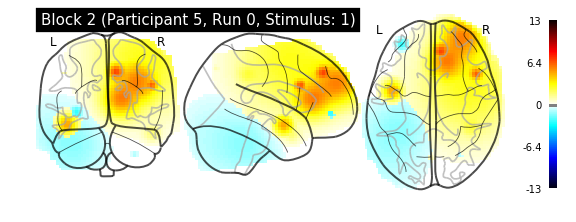

{'weights': tensor([[ 1.0963e+00,  1.1220e+00, -1.3801e+00,  ...,  3.6743e+00,
         -1.3290e+00, -2.1465e+00],
        [ 3.3862e+00,  1.6802e+00, -3.9604e-01,  ...,  1.6130e+00,
          7.5248e-01,  5.5336e+00],
        [ 8.1933e+00,  1.9054e+00,  1.2902e+00,  ...,  4.0786e+00,
          8.1272e-01,  6.0127e-01],
        ...,
        [ 5.1535e+00,  3.7801e+00,  2.3395e+00,  ...,  4.2780e-01,
         -9.1892e-01, -2.3233e+00],
        [ 3.6700e+00,  4.4407e+00, -7.0691e-01,  ...,  3.8571e+00,
         -2.2718e+00, -7.5498e-01],
        [ 1.4394e+00,  3.8788e+00, -2.1007e+00,  ...,  4.4491e+00,
         -2.3193e+00, -1.7602e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0812,  0.0683,  0.0567,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

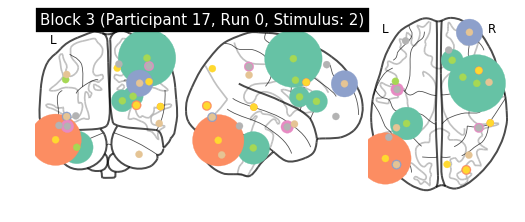

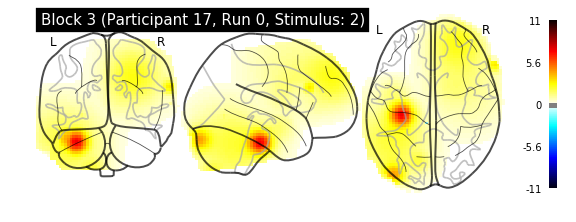

10/04/2018 14:29:23 Reconstruction Error (Frobenius Norm): 2.49255566e+03 out of 6.15246875e+03


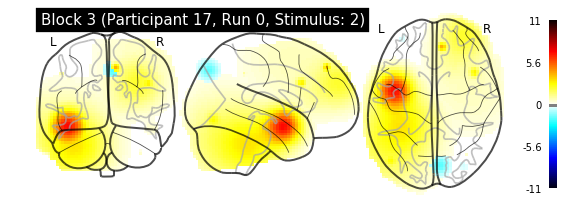

{'weights': tensor([[ 9.9530e-01,  5.9132e-01,  2.2953e+00,  ...,  2.2242e+00,
          2.4684e-01,  1.0555e+00],
        [ 9.1342e-01,  2.2834e-01,  2.4095e+00,  ...,  5.2153e+00,
         -1.0058e+00, -4.0310e-01],
        [ 4.5057e-01,  3.2614e+00,  3.7417e+00,  ...,  2.5535e+00,
          6.3629e-01,  3.4365e+00],
        ...,
        [ 2.2757e+00,  1.1710e+00,  1.8573e+00,  ...,  3.3666e-01,
         -2.7212e-02,  2.6292e-01],
        [ 1.1216e+00, -3.1126e-01,  3.6809e-01,  ...,  4.5521e+00,
         -2.2288e+00,  2.0468e+00],
        [ 2.7893e+00, -2.2988e+00,  2.9871e+00,  ...,  2.9657e+00,
          1.0009e+00,  1.7786e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0347,  0.0274,  0.0213,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

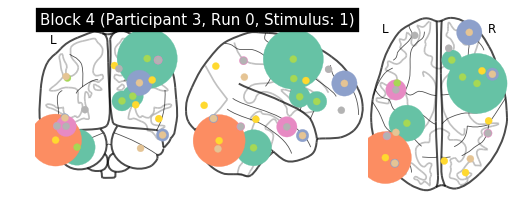

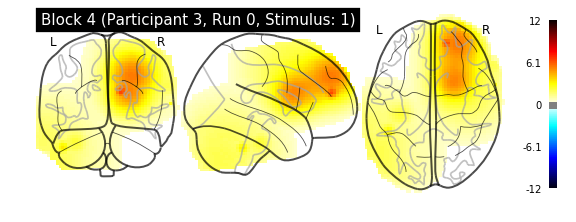

10/04/2018 14:30:09 Reconstruction Error (Frobenius Norm): 2.42833032e+03 out of 6.53506689e+03


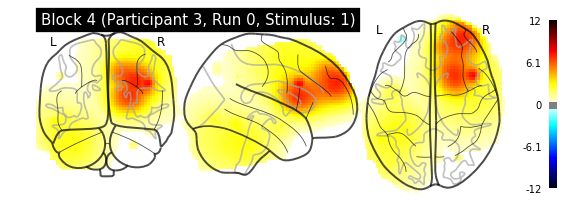

{'weights': tensor([[ 4.5792e+00,  1.5470e+00,  1.3039e+00,  ...,  3.5945e+00,
         -1.3953e+00, -9.8662e-01],
        [ 6.8779e-01,  3.8414e+00,  2.4675e+00,  ...,  2.6427e+00,
         -3.1329e+00,  9.2520e-01],
        [ 3.7792e+00,  1.5240e+00, -4.1298e-01,  ...,  6.3106e+00,
          6.2903e-02,  3.1968e+00],
        ...,
        [ 1.0366e+00,  2.4736e+00,  1.2605e+00,  ...,  3.1394e+00,
         -2.3910e-01, -1.0096e+00],
        [ 3.9476e+00, -7.5305e-01, -8.7530e-01,  ...,  2.5761e+00,
          5.3662e-01, -1.5839e+00],
        [ 4.7993e+00,  3.3309e+00, -9.7350e-01,  ...,  4.8428e+00,
         -2.4392e+00, -2.8714e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0735,  0.0614,  0.0507,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

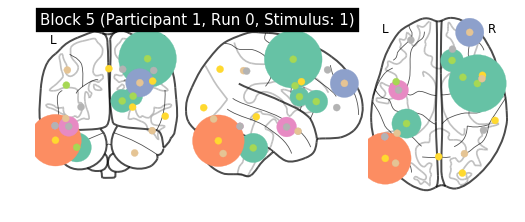

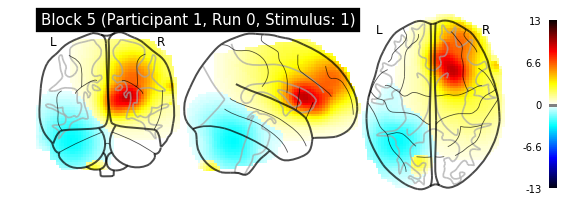

10/04/2018 14:30:54 Reconstruction Error (Frobenius Norm): 2.47962134e+03 out of 6.41621094e+03


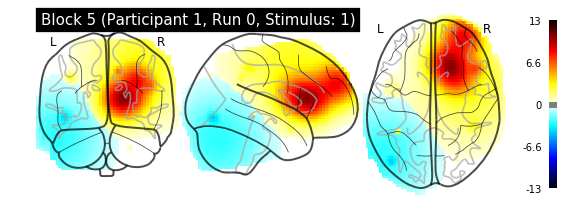

{'weights': tensor([[ 5.0495e+00,  6.3131e+00, -1.4137e+00,  ...,  3.3590e+00,
         -1.1010e+00,  1.0078e+00],
        [ 3.8330e+00,  1.5738e+00, -2.5815e-01,  ...,  4.8226e+00,
         -1.5724e+00, -3.0130e+00],
        [ 3.7177e+00,  3.9484e+00, -5.7440e-01,  ...,  4.6275e+00,
          9.0066e-01,  3.5864e+00],
        ...,
        [ 2.9645e+00,  2.9790e+00,  6.3464e-01,  ...,  3.0518e+00,
         -2.6239e+00, -4.9274e-01],
        [ 3.0993e+00,  1.7704e+00,  1.8568e+00,  ...,  5.5014e+00,
         -8.7425e-01,  1.2196e-01],
        [ 2.3059e+00,  3.1905e+00, -1.9076e+00,  ...,  1.9387e+00,
          1.2739e-01,  5.0457e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0421,  0.0337,  0.0266,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

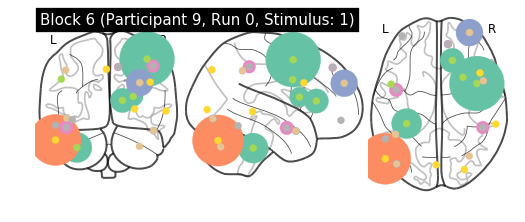

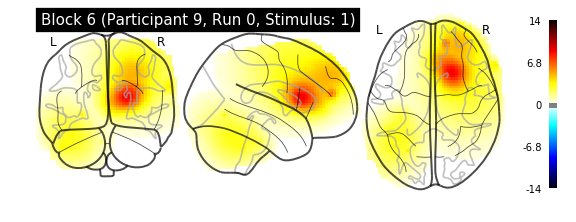

10/04/2018 14:31:41 Reconstruction Error (Frobenius Norm): 2.44471582e+03 out of 6.96013916e+03


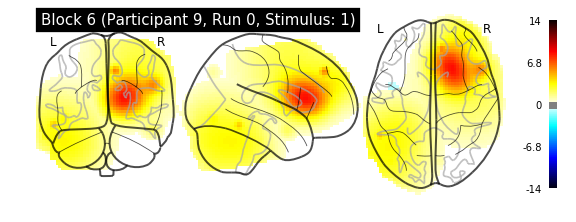

{'weights': tensor([[ 4.3275e+00,  4.7446e+00,  1.6640e+00,  ...,  2.8796e+00,
         -1.4635e-01,  2.5031e+00],
        [ 3.3776e+00,  4.8860e+00, -8.0112e-01,  ...,  2.2878e+00,
         -9.5430e-01,  7.4957e-01],
        [ 3.0817e+00,  2.8819e+00, -5.7163e-01,  ...,  3.1814e+00,
          1.1182e+00,  1.9358e+00],
        ...,
        [ 2.6801e-01,  3.0922e+00, -1.8033e+00,  ...,  2.5566e+00,
          1.0020e+00, -1.8129e-01],
        [ 1.8458e+00,  3.1552e+00,  1.3360e+00,  ...,  4.5488e+00,
          2.9518e+00, -5.8880e-01],
        [ 2.9732e+00,  7.2350e+00,  1.3115e-01,  ...,  2.7574e+00,
          2.7675e+00, -3.3737e-02]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0333,  0.0263,  0.0204,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

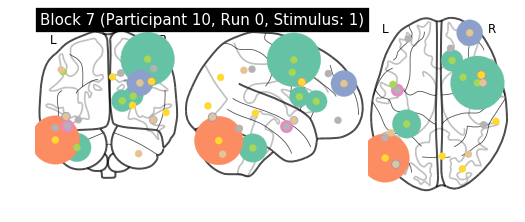

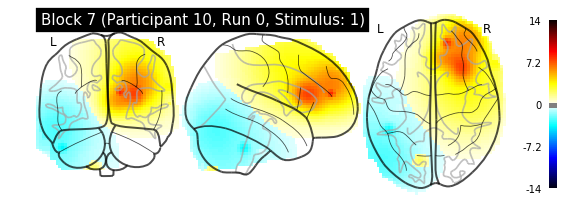

10/04/2018 14:32:27 Reconstruction Error (Frobenius Norm): 2.17231494e+03 out of 7.99037549e+03


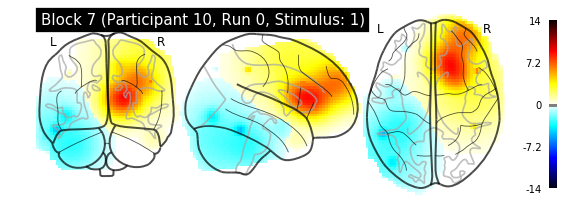

{'weights': tensor([[ 2.7746e+00,  3.6927e+00, -1.3425e+00,  ...,  3.3965e+00,
         -2.4280e-02, -2.1207e+00],
        [ 2.4620e+00,  3.5612e+00,  3.9856e+00,  ...,  1.3041e+00,
         -3.0343e+00,  2.6348e-01],
        [ 6.3738e+00,  3.3429e+00, -5.7564e-01,  ...,  5.0483e+00,
          8.0174e-01,  9.4045e-01],
        ...,
        [ 2.7115e+00,  3.1127e+00, -4.2501e-01,  ...,  1.6776e+00,
         -2.2301e+00,  4.7618e-01],
        [ 3.7946e+00,  6.0432e+00, -1.1865e+00,  ...,  4.9531e+00,
         -3.7863e-01,  2.0365e+00],
        [ 4.5470e+00,  4.2215e+00,  2.5702e+00,  ...,  4.2222e+00,
          1.1684e+00,  8.7798e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0397,  0.0317,  0.0249,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

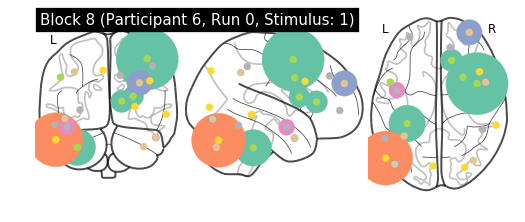

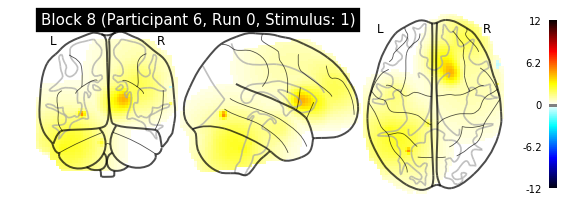

10/04/2018 14:33:13 Reconstruction Error (Frobenius Norm): 2.25728101e+03 out of 5.98447900e+03


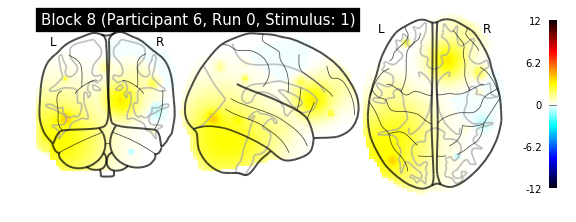

{'weights': tensor([[ 3.5618e-01,  3.3626e+00,  1.7575e+00,  ...,  1.9678e+00,
         -2.0930e+00,  5.1929e-02],
        [ 4.2018e+00,  3.0660e+00,  1.4356e+00,  ...,  4.5758e+00,
         -3.4952e+00,  9.8971e-02],
        [ 6.4626e+00,  9.6980e-01, -1.8393e+00,  ...,  3.1830e+00,
         -3.6080e+00,  4.9629e+00],
        ...,
        [ 5.3289e+00,  4.2041e+00,  1.4644e+00,  ...,  2.3994e+00,
         -1.1259e+00,  6.7120e-01],
        [ 4.6142e+00,  2.0499e+00, -9.8414e-01,  ...,  4.2448e+00,
         -1.4793e+00,  1.6911e+00],
        [ 5.1156e+00,  1.0113e+00, -8.0148e-01,  ...,  3.0043e+00,
          1.7741e+00, -7.1093e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0604,  0.0498,  0.0405,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

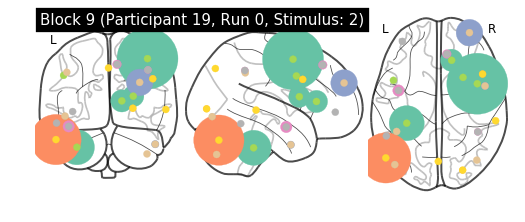

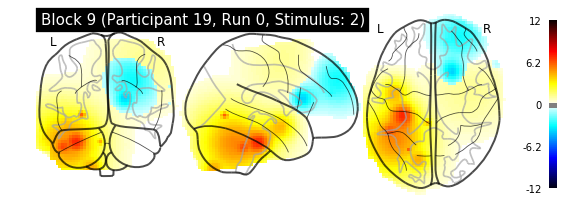

10/04/2018 14:33:59 Reconstruction Error (Frobenius Norm): 2.19903125e+03 out of 6.23607080e+03


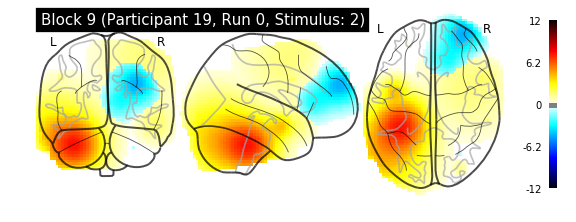

{'weights': tensor([[-3.3942e-01, -2.3375e+00,  5.5629e+00,  ..., -3.3512e+00,
         -9.2133e-01,  2.5140e-01],
        [-1.3488e-01, -9.9581e-01,  3.1590e+00,  ..., -9.2017e-01,
         -2.9347e+00, -1.8353e+00],
        [-1.5330e+00, -6.6989e-01, -1.5741e-01,  ...,  4.7506e-01,
          8.1046e-01,  4.4430e+00],
        ...,
        [ 3.4854e+00, -2.7260e-01,  5.3633e+00,  ...,  2.7690e-01,
         -2.6038e+00,  3.5380e+00],
        [-5.2838e-01, -1.8682e+00,  2.3973e+00,  ...,  1.7206e+00,
         -7.1978e-01,  1.4239e+00],
        [-1.3547e+00, -2.1247e+00,  3.8873e-01,  ..., -1.9298e-01,
          1.5182e+00,  3.9290e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0652,  0.0539,  0.0439,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

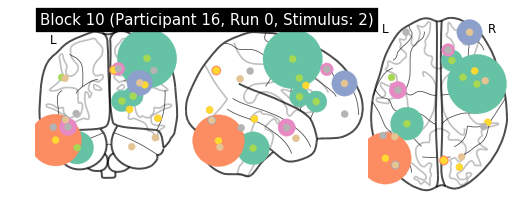

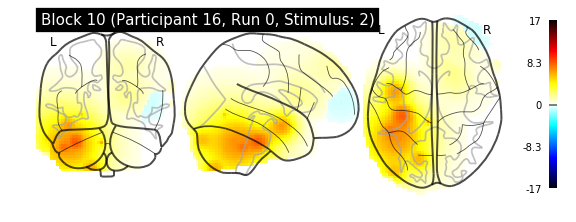

10/04/2018 14:34:46 Reconstruction Error (Frobenius Norm): 2.26097705e+03 out of 9.26213965e+03


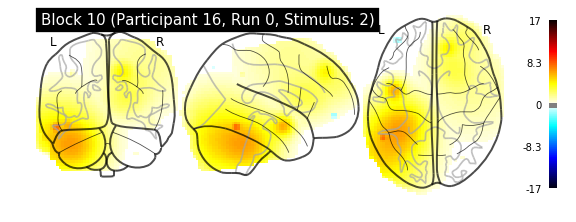

{'weights': tensor([[ 1.8239e+00,  8.8548e-01,  4.7056e+00,  ...,  2.1574e+00,
         -2.0997e+00,  1.6330e-01],
        [-2.1996e+00,  5.9208e-01,  3.6838e+00,  ...,  5.3346e-01,
         -1.0096e+00,  9.2523e-01],
        [ 1.4832e+00, -3.6098e-02,  2.6771e+00,  ..., -5.8611e-01,
         -1.7393e+00,  4.5772e+00],
        ...,
        [ 2.1710e+00, -3.9676e-01,  3.4178e+00,  ...,  2.1620e+00,
         -2.8895e-01,  2.2602e+00],
        [ 1.5287e+00,  1.4732e+00,  3.5661e+00,  ..., -6.0049e-01,
         -7.8800e-01,  2.0988e+00],
        [ 4.1084e+00,  1.3471e+00,  3.9011e+00,  ...,  6.6256e-01,
          7.3811e-01,  4.4125e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0182,  0.0137,  0.0101,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

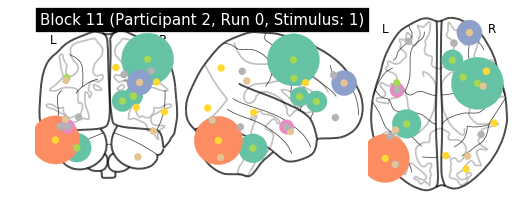

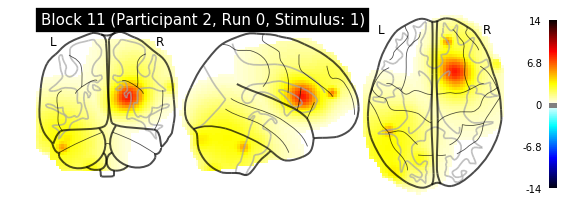

10/04/2018 14:35:38 Reconstruction Error (Frobenius Norm): 2.20161938e+03 out of 6.05434961e+03


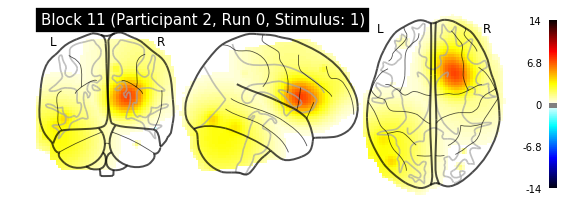

{'weights': tensor([[ 3.9975,  3.1540,  2.4953,  ...,  2.3195, -0.2314, -2.1569],
        [ 3.4855,  1.5390, -2.0721,  ...,  3.6303, -1.6184, -2.4158],
        [ 3.4828,  2.3485,  1.9144,  ...,  3.1445,  4.1914,  4.2640],
        ...,
        [ 2.9874,  2.9492,  2.4469,  ...,  0.5749,  0.0812, -1.7929],
        [ 4.4008,  2.1533, -1.3868,  ..., -0.3467, -0.1535, -1.3192],
        [ 5.1078,  3.0342,  0.7118,  ...,  1.0818, -3.3921,  2.9230]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0390,  0.0311,  0.0244,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[ 25.9128,  12.0385,  14.1031],
        [ 14.6807,  29.8990,   9.3909],
        [

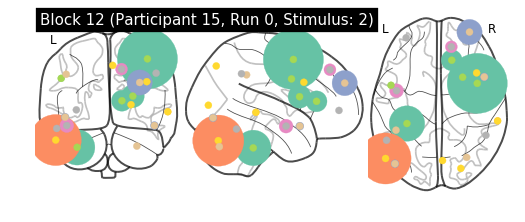

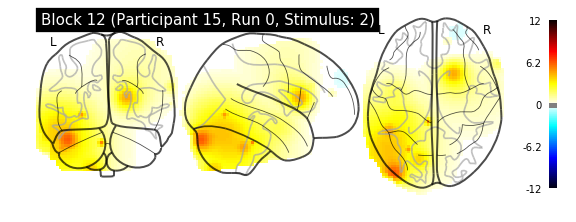

10/04/2018 14:36:28 Reconstruction Error (Frobenius Norm): 2.53029004e+03 out of 7.18119434e+03


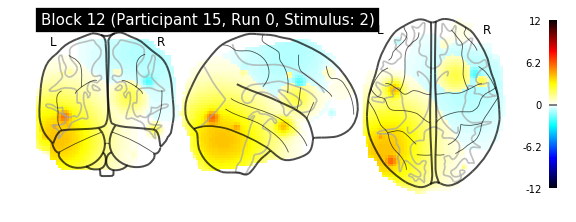

{'weights': tensor([[ 2.2379e+00,  2.3220e-01,  2.2123e+00,  ...,  1.4585e-02,
         -1.0057e+00,  2.1863e+00],
        [-9.5283e-01,  2.6758e-01,  1.8953e+00,  ..., -3.3644e+00,
          9.5474e-01, -1.2711e+00],
        [-8.9187e-01,  4.4997e-01,  4.3003e+00,  ...,  2.5107e+00,
          2.7272e+00,  4.2231e+00],
        ...,
        [ 2.8964e+00,  1.0044e+00,  2.7670e+00,  ...,  2.6115e+00,
          9.4772e-01,  2.9625e+00],
        [ 2.0626e+00, -5.5174e-01,  2.5986e+00,  ...,  1.1449e+00,
         -3.0677e+00,  2.8856e+00],
        [ 8.8706e-01,  8.9125e-01,  1.7603e+00,  ..., -3.0164e-01,
          1.0831e+00,  3.6305e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0274,  0.0214,  0.0164,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

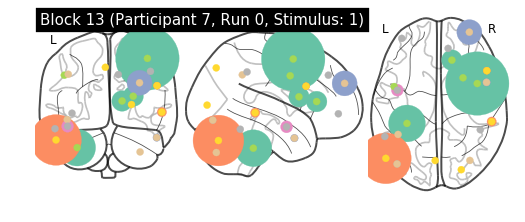

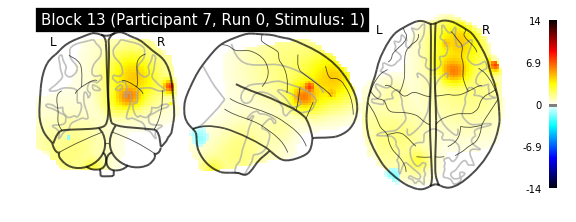

10/04/2018 14:37:18 Reconstruction Error (Frobenius Norm): 2.26190186e+03 out of 6.34869141e+03


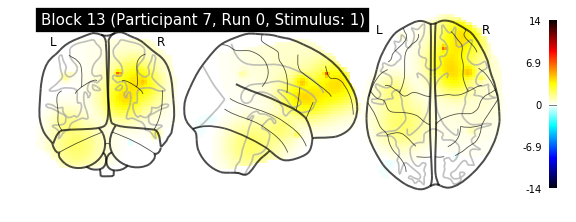

{'weights': tensor([[ 1.7067e+00,  1.3882e+00, -1.1127e-01,  ...,  4.0708e+00,
         -8.2415e-01, -9.1383e-01],
        [ 2.1809e+00,  3.0915e+00,  7.5071e-01,  ...,  5.4979e-01,
         -1.2653e+00, -1.1139e+00],
        [ 4.9359e+00,  3.2815e+00, -5.3822e-01,  ...,  3.1579e-01,
          1.5457e+00,  5.6545e+00],
        ...,
        [ 4.4406e+00,  3.9602e+00,  2.8964e+00,  ...,  1.6215e+00,
          1.0181e+00,  1.8741e+00],
        [ 3.0205e+00,  3.5011e+00,  7.1281e-01,  ...,  2.7434e+00,
         -2.8297e+00, -7.4783e-01],
        [ 2.2050e+00,  2.9829e+00, -1.7795e+00,  ...,  2.1558e+00,
         -6.6073e-01, -8.8811e-03]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0658,  0.0546,  0.0446,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

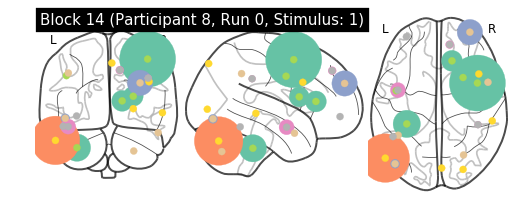

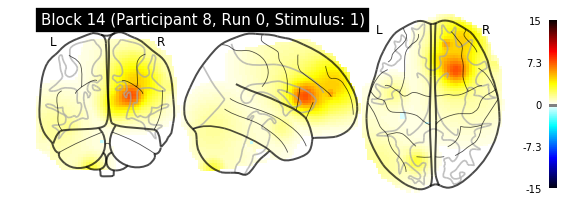

10/04/2018 14:38:23 Reconstruction Error (Frobenius Norm): 2.41121118e+03 out of 7.89253857e+03


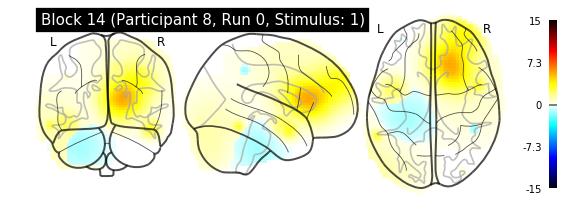

{'weights': tensor([[ 2.3125e+00,  3.6501e+00, -3.5156e-01,  ...,  2.0579e+00,
         -2.7289e+00,  1.1136e+00],
        [ 4.3635e+00,  4.9193e+00, -3.3177e+00,  ...,  2.5094e+00,
          1.1120e+00, -5.3800e-01],
        [ 6.0563e+00,  3.2740e+00,  1.3673e+00,  ...,  3.8189e+00,
          1.2143e-01,  4.1841e+00],
        ...,
        [ 5.2273e+00,  6.4367e+00,  2.1417e+00,  ...,  5.2642e+00,
          1.4791e+00,  2.6033e+00],
        [ 4.5537e+00,  2.9303e+00, -9.8434e-02,  ...,  1.8496e+00,
          1.7851e+00, -9.7410e-01],
        [ 3.4922e+00,  5.6461e+00,  2.4473e+00,  ...,  2.3243e+00,
          3.0323e-01,  3.7084e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0747,  0.0625,  0.0516,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

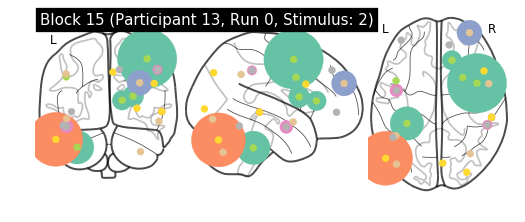

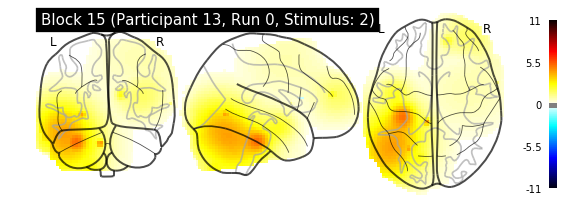

10/04/2018 14:39:09 Reconstruction Error (Frobenius Norm): 2.25002173e+03 out of 5.48174072e+03


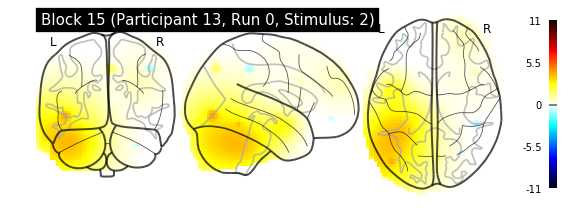

{'weights': tensor([[-0.6110, -0.6195,  3.1256,  ..., -0.8972, -0.9559,  2.1254],
        [-0.0654,  1.2198,  1.0610,  ...,  0.1663, -0.8259,  1.8014],
        [ 2.0959,  1.2601,  0.0210,  ..., -1.4310, -1.8376,  5.8697],
        ...,
        [ 1.6368,  0.8039,  1.6344,  ...,  1.9527,  0.2049,  2.0821],
        [ 1.5710,  2.1644,  0.5180,  ..., -1.1771, -2.1040,  0.5197],
        [ 1.0967, -0.8384,  1.0317,  ...,  0.4509, -1.4160,  2.0116]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0437,  0.0353,  0.0280,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[ 26.0370,  11.4956,  14.0452],
        [ 14.0674,  30.0105,   9.3552],
        [

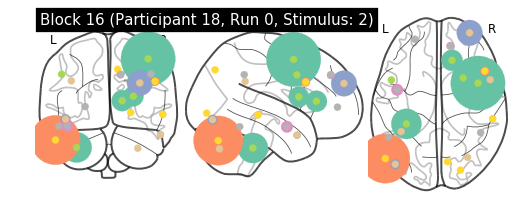

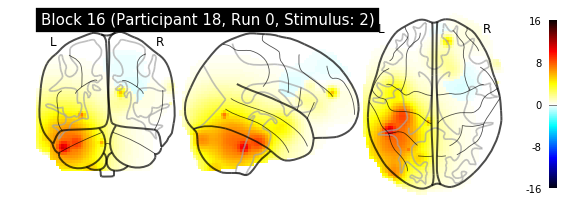

10/04/2018 14:39:56 Reconstruction Error (Frobenius Norm): 2.68445581e+03 out of 1.02790820e+04


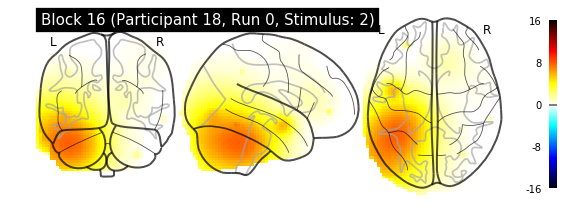

{'weights': tensor([[ 3.3191e-01,  2.4339e+00,  3.7054e+00,  ...,  7.0453e-01,
          1.9573e+00,  5.8689e-01],
        [ 1.1554e+00,  1.5074e+00,  4.6908e+00,  ..., -8.5005e-01,
         -5.8917e-01, -3.9885e-01],
        [ 9.3866e-01,  3.1606e+00,  2.7343e+00,  ...,  1.1829e+00,
          1.1212e+00,  5.0731e+00],
        ...,
        [-6.5944e-01, -2.1545e+00,  2.0686e+00,  ..., -3.6578e-01,
         -4.2240e-01,  1.3974e+00],
        [ 9.5943e-01, -1.9495e-02,  2.8322e+00,  ..., -6.7166e-02,
         -1.7524e+00,  3.7589e+00],
        [ 2.5801e+00, -2.5020e-01,  6.4891e+00,  ...,  2.3406e+00,
         -2.3285e+00,  3.4860e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0363,  0.0289,  0.0226,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

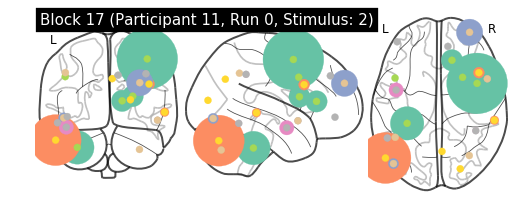

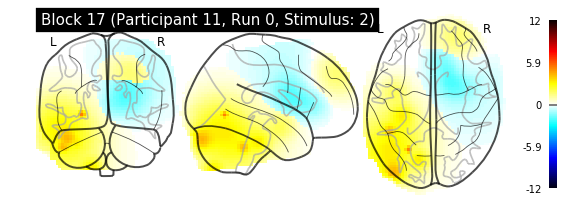

10/04/2018 14:40:43 Reconstruction Error (Frobenius Norm): 2.23368042e+03 out of 5.44554590e+03


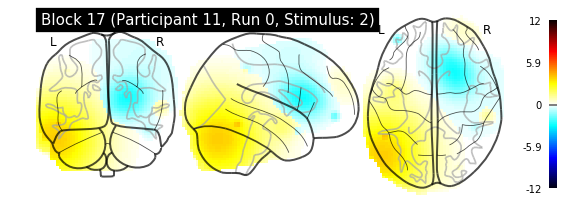

{'weights': tensor([[-1.6654, -0.5700,  0.5715,  ...,  3.4762, -0.0662,  2.5795],
        [-0.9354,  0.7271,  2.1824,  ..., -2.4276,  2.4413, -1.3970],
        [-2.4798,  0.4493,  0.7084,  ...,  1.7322, -0.2839,  4.3844],
        ...,
        [ 0.1017,  0.3088,  1.6428,  ...,  0.8174, -1.9500,  1.8394],
        [ 2.6302,  1.4497,  2.5357,  ..., -0.6823, -2.4313, -1.0338],
        [ 0.4215, -2.8686,  0.8163,  ..., -0.7511, -1.4510,  4.9788]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0477,  0.0387,  0.0308,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[ 26.1489,  11.6286,  13.9524],
        [ 14.2072,  29.9379,   9.3646],
        [

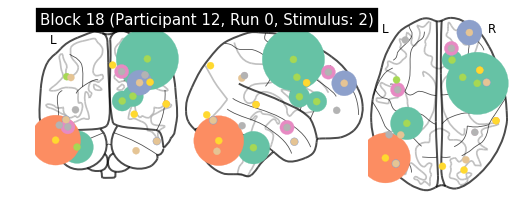

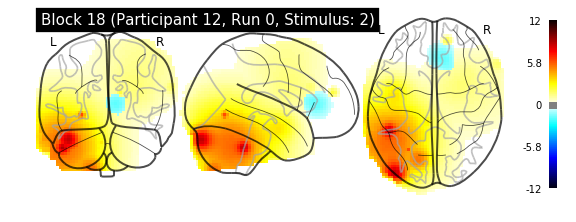

10/04/2018 14:41:30 Reconstruction Error (Frobenius Norm): 2.37780811e+03 out of 6.36352539e+03


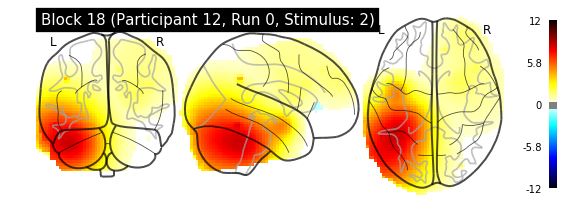

{'weights': tensor([[ 1.4389, -1.7942,  2.3025,  ...,  0.4832,  1.8575,  0.6898],
        [-1.3106, -2.7678, -0.4244,  ..., -0.3039, -1.1452, -0.5397],
        [ 2.8373,  1.4841,  2.5974,  ...,  2.3673,  0.5962,  0.1851],
        ...,
        [ 0.9017,  0.2760,  0.6430,  ..., -1.1199,  1.0602,  2.0077],
        [ 2.4835,  2.4500,  4.5626,  ...,  1.8432,  2.0548, -0.3819],
        [-0.7328,  1.8292,  3.1374,  ...,  1.8153, -2.2125,  2.6605]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0690,  0.0575,  0.0472,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[ 25.9783,  11.9315,  14.0545],
        [ 14.5041,  29.8889,   8.8781],
        [

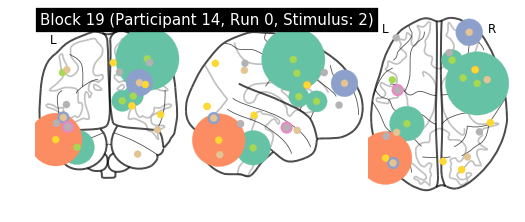

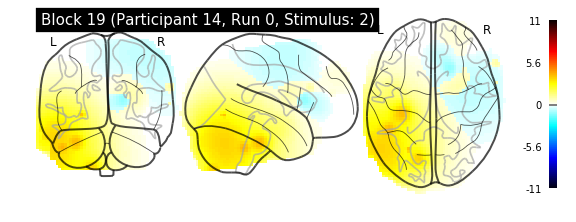

10/04/2018 14:42:17 Reconstruction Error (Frobenius Norm): 2.28267285e+03 out of 5.87585352e+03


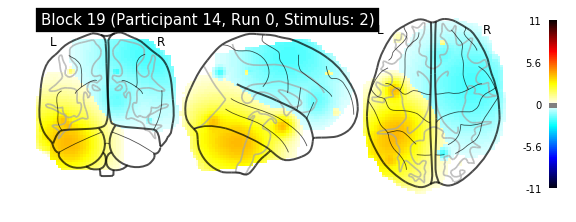

{'weights': tensor([[ 8.5012e-01, -8.6356e-01,  1.7987e+00,  ...,  4.6245e-01,
          3.4142e-01,  3.3664e+00],
        [ 1.0936e+00,  9.9013e-01, -7.6859e-01,  ..., -5.4427e-01,
         -3.2024e+00,  2.5467e+00],
        [ 4.1350e-01, -9.9181e-01,  1.2639e+00,  ...,  4.1248e+00,
         -3.0125e+00,  1.7093e+00],
        ...,
        [ 4.1287e-01,  1.4926e+00,  3.6799e+00,  ...,  2.8304e+00,
         -3.9784e-01,  9.2016e-01],
        [ 9.5745e-01, -3.9727e-01,  3.0682e+00,  ...,  4.7033e+00,
          2.3204e+00, -8.5497e-01],
        [ 1.9071e+00,  1.1497e+00,  3.4343e+00,  ...,  2.0716e+00,
         -1.5151e+00,  2.5064e+00]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0711,  0.0591,  0.0485,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

In [14]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

In [15]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task %s' % block.task

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


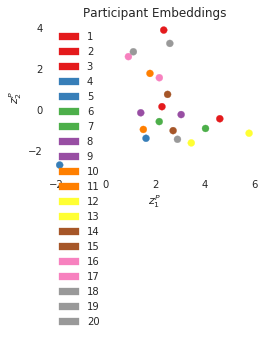

In [16]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


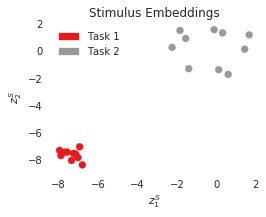

In [17]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

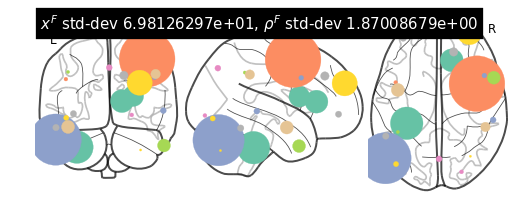

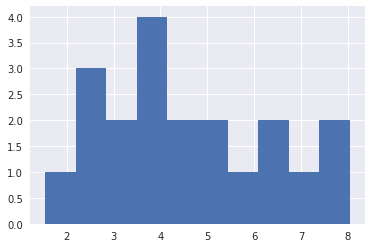

(<nilearn.plotting.displays.OrthoProjector at 0x7ffa2e64c710>,
 tensor([[ 26.1575,  11.8169,  14.2207],
         [ 14.3423,  29.7985,   8.9162],
         [-33.0378, -36.4404, -39.5128],
         [ 40.8537,   5.1925,  53.1227],
         [-44.6475,   6.5147,  32.0076],
         [ 57.8668, -32.9080,  -1.0866],
         [-55.3521, -73.1825, -31.6178],
         [ 48.6175,  13.7799,  33.9619],
         [ 24.6146, -87.5594,  -5.6570],
         [  0.9625, -73.9214,  44.1578],
         [-42.3933, -45.6042,  39.5357],
         [ 58.5674,  11.4855, -37.8128],
         [-44.2594, -79.3711,  -8.7641],
         [ 32.9834,  59.5051,  28.1979],
         [ 33.9583, -71.1879, -42.5384],
         [-42.3620,  -1.4284, -18.2597],
         [ 49.7804, -40.3320,  37.3773],
         [ 16.3231,  38.6287,  35.9015],
         [-36.6894,  53.0179,  -4.3171],
         [-55.0600, -49.9369, -18.9348]]),
 tensor([ 6.0751,  6.2642,  6.9670,  8.0408,  2.6547,  3.5532,  7.8755,
          3.1343,  2.7557,  3.5623,  2.3309

In [18]:
dtfa.visualize_factor_embedding()

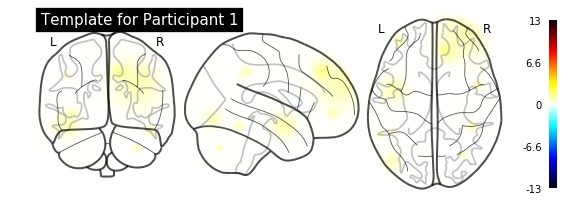

In [19]:
dtfa.plot_subject_template(1)

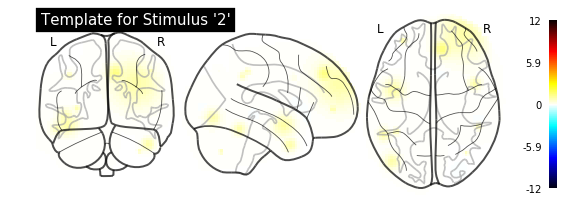

In [20]:
dtfa.plot_task_template('2')

In [21]:
def group_labeler(block):
    if block.subject <= 10:
        return 'Group 1'
    else:
        return 'Group 2'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


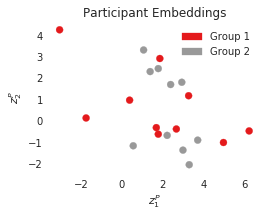

In [22]:
dtfa.scatter_subject_embedding(labeler=group_labeler)